In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [70]:
def findClosestCentroids(X,centroids):
    idx=[]
    for i in range(X.shape[0]):
        idx.append(np.argmin(np.sum((X[i]-centroids)**2,axis=1))+1)
    return np.asarray(idx)

In [71]:
def computeCentroids(X,idx,K):
    mm=[]
    for i in range(1,K+1):
        mm.append(np.mean(X[idx==i],axis=0))
    return np.asarray(mm)

In [72]:
def cost(X,idx,centroids):
    return (1.0/X.shape[0])*np.sum((X-centroids[idx-1])**2)

In [78]:
def runkMeans(X,K,itera):
    cent=[]
    ridx=np.random.randint(0,X.shape[0],(K,1))
    centroids = X[ridx].reshape(K,X.shape[1])
    print('Initial centroids : ',centroids)
    cent.append(centroids)
    for i in range(itera):
        idx=findClosestCentroids(X,centroids)
        centroids=computeCentroids(X,idx,K)
        cent.append(centroids)
    print('cost : ',cost(X,idx,centroids))
    return centroids,cent

(300, 2)


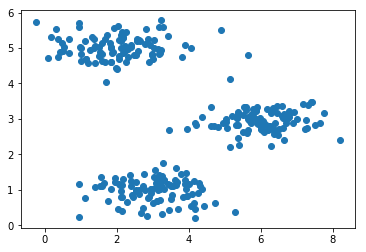

In [79]:
X=sio.loadmat('../machine-learning-ex7/ex7/ex7data2.mat')['X']
print(X.shape)
plt.plot(X[:,0],X[:,1],'o')
plt.show()

In [80]:
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]]).reshape(3,2)
idx=findClosestCentroids(X,initial_centroids)
print('Closest Centroids : ',idx[:3])
print('Centroids after initial : ',computeCentroids(X,idx,K))

Closest Centroids :  [1 3 2]
Centroids after initial :  [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [81]:
centroids,cent=runkMeans(X,K=3,itera=50)

Initial centroids :  [[2.66046572 5.19623848]
 [5.91280273 2.85631938]
 [3.30063655 1.28107588]]
cost :  0.8888617321830646


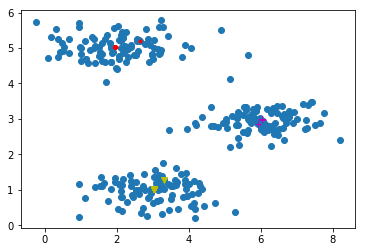

In [82]:
plt.plot(X[:,0],X[:,1],'o')
for i in cent:
    plt.plot(i[0,0],i[0,1],'r.')
    plt.plot(i[1,0],i[1,1],'m+')
    plt.plot(i[2,0],i[2,1],'yv')
plt.show()

# image

(16384, 3)


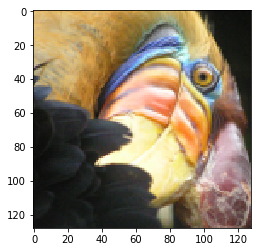

In [84]:
img=plt.imread('../machine-learning-ex7/ex7/bird_small.png')
plt.imshow(img)
imgc=img.copy()/255.0
imgc=imgc.reshape(128*128,3)
print(imgc.shape)

In [92]:
centroids,_=runkMeans(imgc,2,60)

Initial centroids :  [[0.0030296  0.00247597 0.00098424]
 [0.0004306  0.00052288 0.00049212]]
cost :  1.0706310149544151e-06


[1 1 1 ... 2 2 2]


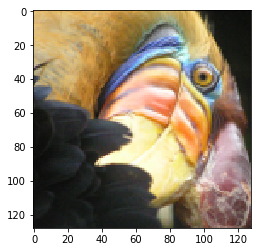

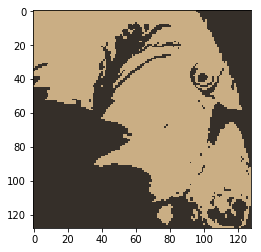

In [93]:
idx=findClosestCentroids(imgc,centroids)
print(idx)
imgcc=(centroids[idx-1]).reshape(128,128,3)
plt.imshow(img)
plt.show()
plt.imshow(imgcc*255)
plt.show()